# Practical 3: Visualisations 

## Dataset

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

In [ ]:
import os
import platform

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

pd.options.mode.chained_assignment = None

print(f"My Python version is: {platform.python_version()}")
print(f"My Numpy version is: {np.__version__}")
print(f"My Pandas version is: {pd.__version__}")
print(f"My Seaborn version is: {sns.__version__}")

My Python version is: 3.13.2
My Numpy version is: 2.2.3
My Pandas version is: 2.2.3
My Seaborn version is: 0.13.2


### Assignment 0: load and inspect data

The breast cancer dataset is available on Brightspace. It's a pickled DataFrame. You can read it with the pickle module, but pandas also provides the convenient ``read_pickle()`` function. 

```{warning}
Pickle files are byte streams created by Python which makes it insanely fast compared to reading in csv files. You can not read them with an IDE like Spyder. However, when loading in, it immediately runs in Python. This makes it a very interesting tool for hackers to put their programs on. Make sure to only read in trusted pickle files!
```

- **Read the data with the ``read_pickle()`` function and check what type it returns by using ``.type()``.**
- **Print the head of the DataFrame.**
- **Describe the DataFrame**

You should get something like this:

In [2]:
path = os.getcwd()
file = "breast_cancer.pickle"
file_loc = os.path.join(path, file)
df_cancer = pd.read_pickle(file_loc)
print(type(df_cancer))
print(df_cancer.head())
print(df_cancer.describe())

<class 'pandas.core.frame.DataFrame'>
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760             NaN              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst p

## Exploratory data analysis

### Assignment 1: Data cleaning

The dataset is pretty clean, but you still have to make sure that there are no mistakes in there.

- **Remove the whitespace from the column names. Print out the column names.**
- **Convert cclass to a categorical variable and print out the unique categories.**
- **Count the missing values in every column.**

In [3]:
df_cancer.columns = df_cancer.columns.str.replace(" ", "_")
print(df_cancer.columns, "\n")

df_cancer["cclass"] = df_cancer["cclass"].astype('category')
print(df_cancer['cclass'].unique(), "\n")

print(df_cancer.isnull().sum())  # any returns True if any element is true

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'cclass'],
      dtype='object') 

['malignant', 'benign']
Categories (2, object): ['benign', 'malignant'] 

mean_radius                1
mean_texture               1
mean_perimeter             1
mean_area                  0
mean_smoothness            1
mean_compactness           0
mean_concavity             1
mean_concave_points        2
mean_symmetry 

There appear to be some missing values but nothing too big. There are a couple of options here:

- You can use .interpolate() on a DataFrame to fill empty data points within the range of a discrete set of known datapoints.
- You can use .fillna() and pass a value to replace the NaNs with, for example, you could use the columns mean.

For the sake of the exercise we are going to explore the different options. We will use three options for the columns containing 'mean', 'worst' and 'error'. To only use your method on a subset of columns, we first have to define these columns. We could do that hardcoded, use a for loop or use list comprehension. The last one is by far the nicest and fastest:

```python
# our df has the columns col1 to col25 and we are only interested in columns that contain a 2
# first option: hardcoded
cols_to_keep = ['col2', 'col12', 'col20', 'col24']

# second option: for loop
cols_to_keep = []
for col in df:
    if '2' in col:
        cols_to_keep.append(col)

# third option: list comprehension
cols_to_keep = [col for col in df.columns if '2' in col]
```

Now it is your turn, please use list comprehension to define the column names and then assess these with df[cols_to_keep]

- **For the columns containing 'mean' : use ``.fillna()`` to fill the missing values with the mean of the column**
````{margin}
```{admonition} Tip
:class: tip
look at the method parameter
```
````
- **For the columns containing 'worst' : use ``.fillna()`` to fill the missing values with the last valid observation**
- **For the column containing 'error' : use ``.interpolate()`` to fill the missing values in a linear way (look at documentation)**
- **Check if all values are filled by by doing ``df.isnull().any().any()``**

You should get something like this:

In [4]:
mean_cols = [col for col in df_cancer.columns if 'mean' in col]
df_cancer[mean_cols] = df_cancer[mean_cols].fillna(df_cancer[mean_cols].mean())

worst_cols = [col for col in df_cancer.columns if 'worst' in col]
df_cancer[worst_cols] = df_cancer[worst_cols].ffill() # df.fillna(method='ffill') is depreciated

error_cols = [col for col in df_cancer.columns if 'error' in col]
df_cancer[error_cols] = df_cancer[error_cols].interpolate(method='linear')

df_cancer.isnull().any().any()  # chaining any gives try if any element is try for any column

np.False_

### Assignment 2: descriptives

For the coming few exercises it is a good idea to narrow the scope a little bit. For now, let's only look at the columns with "mean" in the name and "cclass".

- **Add "cclass" to your list of mean_cols by using append or by using the + operator. Print this list**
- **Substract only the mean_columns and assign it to a new DataFrame. Print the head**

You should get something like this:

In [5]:
mean_cols.append("cclass")  # we'll also need this column
#mean_cols += ["cclass"]  # does the same thing
print(mean_cols, "\n")

df_subcancer = df_cancer[mean_cols]
print(df_subcancer.head())

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'cclass'] 

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760        0.088427              0.14710         0.2419   
1           0.07864        0.086900              0.07017         0.1812   
2           0.15990        0.197400              0.12790         0.2069   
3           0.28390        0.241400          

This looks more manageable for now. Let's do some discriptives that you already know. 

- **Print the median of all columns.**
- **How many benign and malignant cases do we have?**

You should get something like this:

In [6]:
print(df_subcancer.median(numeric_only=True), "\n")
print(df_subcancer["cclass"].value_counts())

mean_radius                13.37000
mean_texture               18.87000
mean_perimeter             86.34000
mean_area                 551.10000
mean_smoothness             0.09592
mean_compactness            0.09263
mean_concavity              0.06154
mean_concave_points         0.03384
mean_symmetry               0.17920
mean_fractal_dimension      0.06155
dtype: float64 

cclass
benign       357
malignant    212
Name: count, dtype: int64


### Assignment 3: plotting variables

Time for some visual inspection. You will use a mix of seaborn and matplotlib (with and without object-oriented interface). But first:
````{margin}
```{admonition} Tip
:class: tip
Remember boolean indexing?
```
````
- **Make a DataFrame with only the benign cases and another one with only the malignant cases.**

- **Print out their shapes with ``.shape``.**

You should get something like this:

In [7]:
df_subbenign = df_subcancer[df_subcancer.cclass == "benign"]
df_submalig = df_subcancer[df_subcancer.cclass == "malignant"]
print(df_subbenign.shape, df_submalig.shape)  # shape is an attribute not a method

(357, 11) (212, 11)


Take a look at the distribution of mean_radius for the benign and malignant cases. To do so you have to plot a histogram for both in the same figure. Do this using the ``matplotlib.pyplot`` sublibrary (import on top). Remember to first define a figure and then plot a hist?

- **Create a histogram for mean_radius for the malignant and benign cases. Add a legend, xlabel and ylabel. Choose wheter you use interactive plotting or object-oriented plotting**

You can spice up your vanilla matplotlib with the built-in [stylesheets](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html).

You should get something like this:

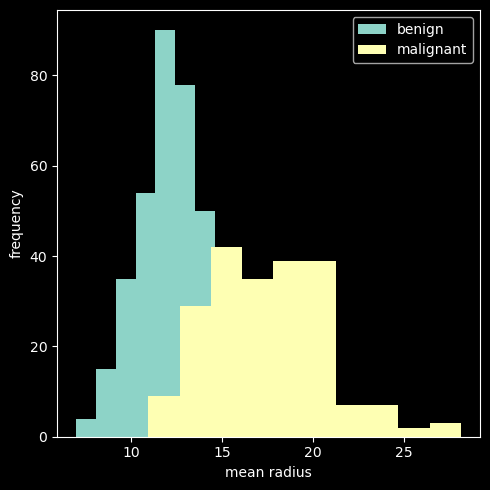

In [8]:
with plt.style.context("dark_background"):  # stylesheet example with context manager
    plt.figure(figsize=[5, 5])  # interactive plotting
    plt.hist(df_subbenign["mean_radius"], label="benign")
    plt.hist(df_submalig["mean_radius"], label="malignant")
    plt.xlabel("mean radius")
    plt.ylabel("frequency")
    plt.tight_layout()
    plt.legend();  # I sometimes use ; to surpress output in Jupyter
# now the style is back to the default
# alternatively use plt.style.use(....), this will change all plots though

Ok we can already see that with the first variable we picked we can see some differentiation between the groups. Good job by us. This figure is not going to win us any prizes though. We can spend a lot of time tweaking the figure or we can use Seaborn which is just an abstraction layer over matplotlib to make pretty statistical figures. Note that we can adjust Seaborn figures with matplotlib.pyplot as well. So if we want to add a legend after the figure has been made with seaborn we can just call the ``plt.legend()`` function like you regularly would.

- **Make the same figure using histplot from the seaborn library. Make sure you pass kde as False.**
- **Add a legend to the plot**

You should get something like this:

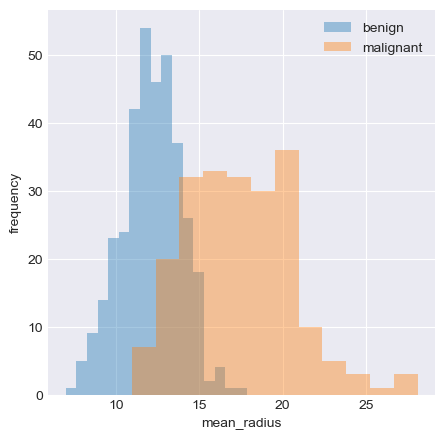

In [9]:
with plt.style.context("seaborn-v0_8-darkgrid"):
    fig, ax = plt.subplots(figsize=[5, 5])  # note that we now use object-orientied (OO) plotting
    sns.histplot(df_subbenign["mean_radius"], kde=False, label="benign",  edgecolor=None, ax=ax, alpha=0.4)  # note the ax=ax in the OO-way
    sns.histplot(df_submalig["mean_radius"], kde=False, label="malignant", edgecolor=None, ax=ax, alpha=0.4)
    ax.set_ylabel("frequency")
    ax.legend()
    plt.show()

This figure is about 30% cooler than the one you had before. It becomes even better when you don't disable the KDE.

- **Redo the figure wit kde enabled.**

You should get something like this:

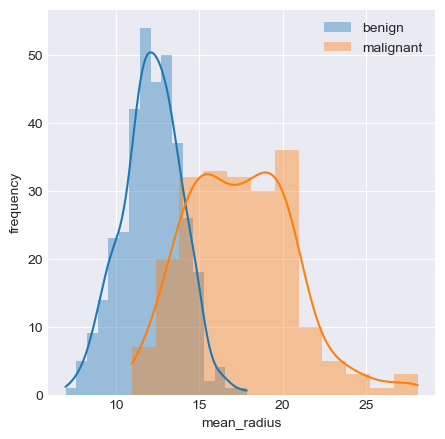

In [10]:
with plt.style.context("seaborn-v0_8-darkgrid"):
    fig, ax = plt.subplots(figsize=[5, 5])  # note that we now use object-orientied (OO) plotting
    sns.histplot(df_subbenign["mean_radius"], kde=True, label="benign", edgecolor=None, ax=ax, alpha=0.4)  # note the ax=ax in the OO-way
    sns.histplot(df_submalig["mean_radius"], kde=True, label="malignant", edgecolor=None, ax=ax, alpha=0.4)
    ax.set_ylabel("frequency")
    ax.legend()
    plt.show()

Now it looks like you really know what you are doing. We have 10 variables though. We could make 10 seperate figures with a for loop but we could also make a figure with 10 subplots, which gives us a much better overview!

- **Make a figure with 10 axes using plt.subplots(), assign the returned values to fig, axes.**
```python
fig, axes = plt.subplots(5, 2)  # 10 axes in 1 figure: 5 rows, 2 columns.
```

- **Axes is multidimensional (you can check this with .shape), flatten it with ``.ravel()`` so it's easier to iterate through it.**

- **Now loop through (1) all the columns of the DataFrame and (2) the axes of your figure and plot the histograms (remember zip()?). ``histplot`` takes an ax argument for the axis you want it to plot on. Disable the KDE again. You might need to increase the figure size and/or use plt.tight_layout() to get a nicer fit.**

- **Add a legend to only the first plot by calling ``.legend()`` on the first axis object (ax[0]).**

You should get something like this:

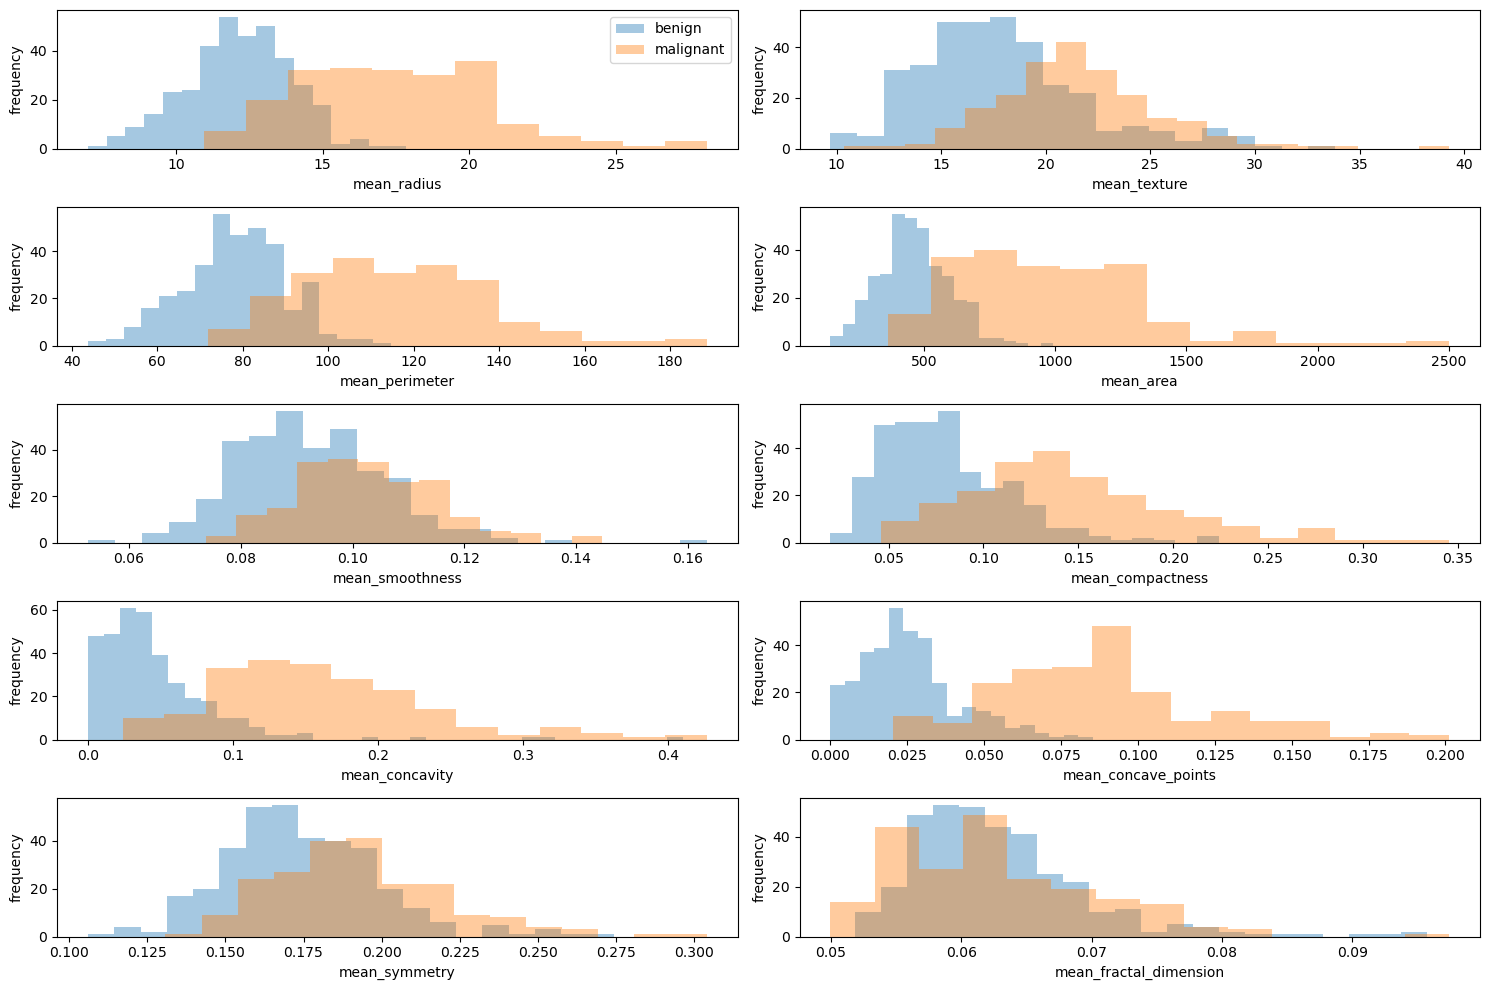

In [11]:
fig, axes = plt.subplots(5, 2, figsize=[15, 10])  # 10 axes in 1 figure

ax = axes.ravel()  # flatten the array

for i_ax, col in zip(ax, df_subbenign):  # cols are the same so it does not matter if I loop through subbenign or submalig
    sns.histplot(df_subbenign[col], kde=False, label="benign", ax=i_ax, edgecolor=None, alpha=0.4)
    sns.histplot(df_submalig[col], kde=False, label="malignant", ax=i_ax, edgecolor=None, alpha=0.4)
    i_ax.set_ylabel("frequency")
ax[0].legend()
plt.tight_layout()    

### Assignment 4: scale variables

Alternatively you might want to use a boxplot to assess the distribution of your data. Regarding boxplots, pandas actually provides a very nice ``.boxplot`` method on your DataFrame. We did not handle this way of plotting extensively but we want you to try it out. Just call the ``.boxplot`` on your dataframe.

::::{important}
While we are approaching machine learning, scaling your data becomes **really important**!! We need to make sure that our variables are on a similar scale. You can do so with ``StandardScaler`` or ``scale`` from the sklearn package. Note that you can only scale floats so make sure you don't try to scale the "cclass" column.
::::


- **Scale your data**
- **Make a boxplot with the pandas ``.boxplot()`` method and pass by="cclass".**

You should get something like this:

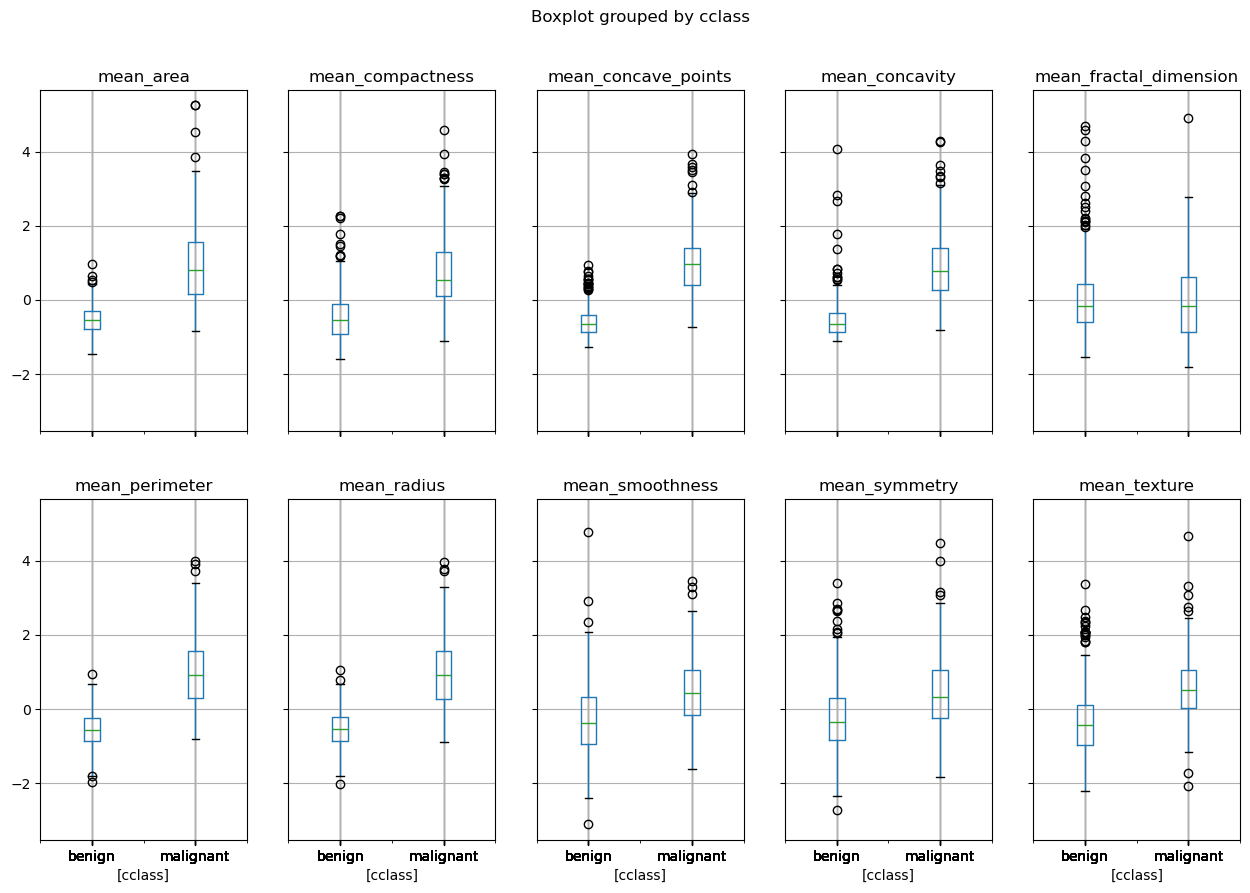

In [12]:
floatcols = df_subcancer.columns[:-1]
df_subcancer[floatcols] = scale(df_subcancer[floatcols])
df_subcancer.boxplot(by="cclass", figsize=(15, 10), layout=(2, 5))
plt.show()

Ofcourse we can do the same thing with seaborn. There's a couple of ways you could do this, but just repeat what you did with the histograms.

- **Define a figure, find out what the figsize parameter does**

- **Plot the boxplots using ``boxplot()`` from the seaborn library. Use ``x="cclass", y=col, data=df_subcancer`` and set notch to True (what does it do?).**

- **Overlay the boxplot with the individual datapoints by using swarmplot, also from the seaborn library.**

- **Add a title to the plot (Have a look at plt.suptitle())**

You should get something like this:

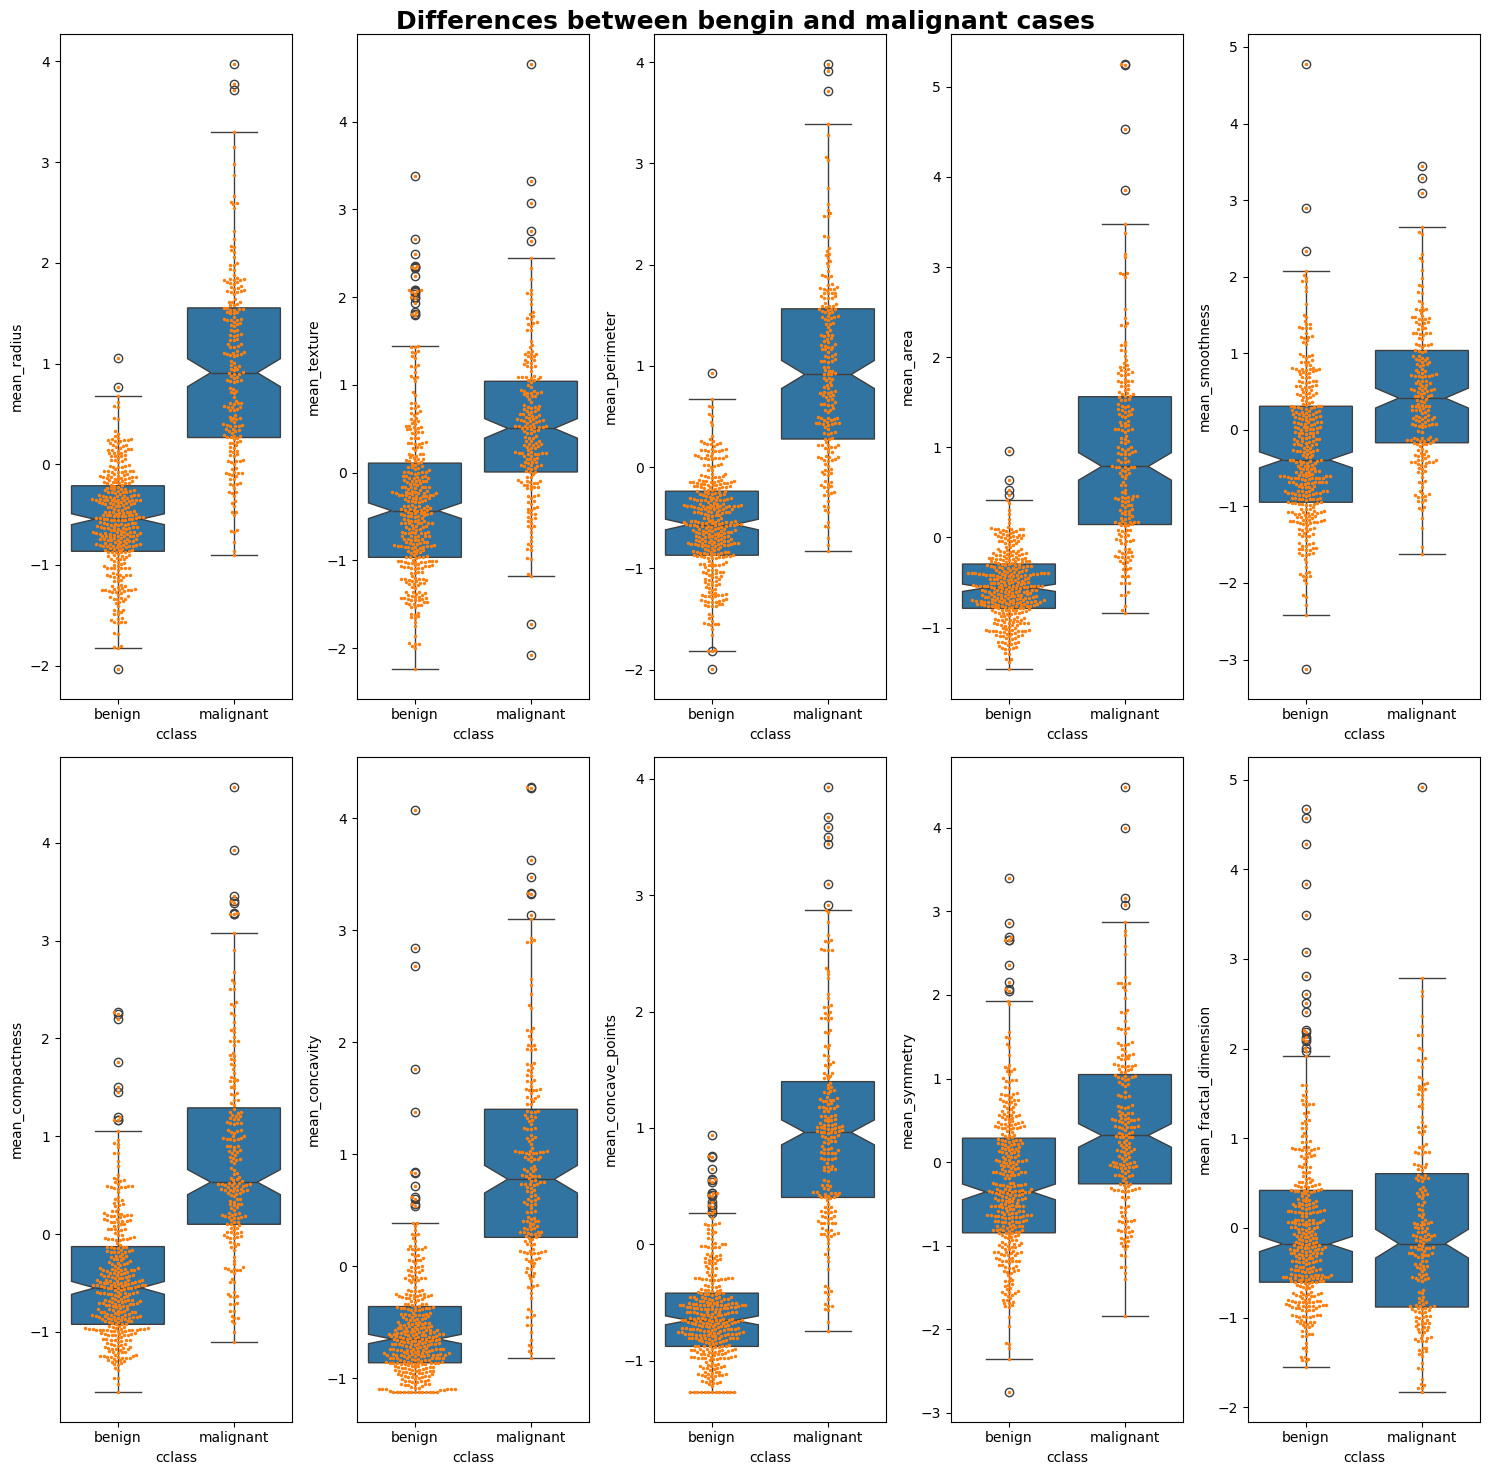

In [13]:
fig, axes = plt.subplots(2, 5, figsize=[15, 15])  # 10 axes in 1 figure

ax = axes.ravel()  # flatten the array

for i_ax, col in zip(ax, df_subcancer):
    sns.boxplot(x="cclass", y=col, data=df_subcancer, notch=True, ax=i_ax)
    sns.swarmplot(x="cclass", y=col, data=df_subcancer, ax=i_ax, size=2.5)
    
plt.suptitle('Differences between bengin and malignant cases', weight='bold', fontsize=18)
plt.tight_layout()    

This figure can tell us a lot. We can already guesstimate some of our statistical outcomes from the notches in the plot. Although not officially, if the two notches don't overlap there is strong evidence that the medians differ! More formal testing will come later though.

### Assignment 5: group statistics

- **Use groupby to find the mean and standard deviation for all columns grouped by "cclass". Print the outcome**

In [14]:
print(df_subcancer.groupby("cclass", observed=False).agg(['mean', 'std']))

          mean_radius           mean_texture           mean_perimeter  \
                 mean       std         mean       std           mean   
cclass                                                                  
benign      -0.561849  0.505789    -0.319241  0.930004      -0.571743   
malignant    0.946132  0.911892     0.537589  0.880114       0.962793   

                    mean_area           mean_smoothness            \
                std      mean       std            mean       std   
cclass                                                              
benign     0.486943 -0.546349  0.381926       -0.275436  0.957009   
malignant  0.901210  0.920031  1.046453        0.463824  0.898286   

          mean_compactness           mean_concavity            \
                      mean       std           mean       std   
cclass                                                          
benign           -0.459694  0.639612      -0.535277  0.548826   
malignant         0.774107  

```{note}
The most logical step for now would be to move over to statistics and first adress the basics (normality testing, calculate confidence intervals, t-test, wilcoxon, ..). However, these steps are easier and we would like to spend more time on Regression analysis and Principal Component Analyses in this practical (which is way cooler of course). Hypothesis testing comes after the PCA. Let's first dive in the Regression analysis!
```

## Regression/fitting primer

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). More specifically, regression analysis helps one understand how the typical value of the dependent variable (or 'criterion variable') changes when any one of the independent variables is varied, while the other independent variables are held fixed. ([ref](https://en.wikipedia.org/wiki/Regression_analysis))

It is clear from the previous plots that some of the variables are related to each other. In the next section we will visualize these relationships and try to fit a model to explain them.

### Assignment 6: scatter

- **Make a scatterplot for mean_concavity and mean_concave_points for both groups combined. Just use the matplotlib functions to plot this, no need for seaborn yet.**

You should get something like this:

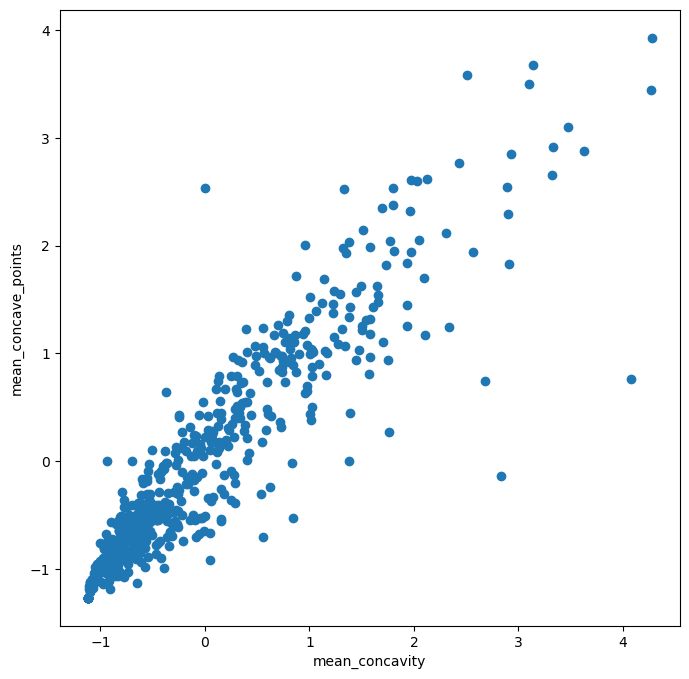

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(df_subcancer.mean_concavity, df_subcancer.mean_concave_points)
plt.xlabel("mean_concavity")
plt.ylabel("mean_concave_points")
plt.show()

### Assignment 7: line-fitting

Fitting lines is the basis of all statistics. You can mentally already fit a line through your just made scatter plot. In essence, you want to see if you can predict one variable from the data of the other variable.

- **Import polyfit from the numpy.polynomial.polynomial sublibrary.**
- **Fit a line through mean_concavity and mean_concave_points with the polyfit function. Use a first order function.**

- **Check what the function returns, also use the [docs](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html).**

- **You fitted a first order function, so the function you fitted is: y = b + ax. Make a variable y_pred that uses the values from polyfit to predict mean_concave_points from mean_concavity.**

- **Add an x and ylabel**

You should get something like this:

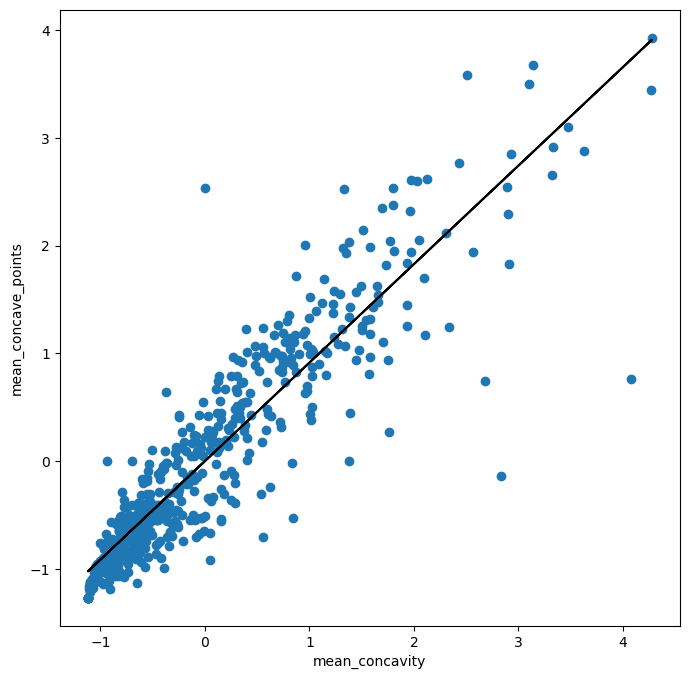

In [16]:
from numpy.polynomial.polynomial import polyfit

c = polyfit(df_subcancer.mean_concavity, df_subcancer.mean_concave_points, 1)
y_pred = c[0] + df_subcancer.mean_concavity * c[1]

plt.figure(figsize=(8, 8))
plt.scatter(df_subcancer.mean_concavity, df_subcancer.mean_concave_points)
plt.plot(df_subcancer.mean_concavity, y_pred, "k")
plt.xlabel("mean_concavity")
plt.ylabel("mean_concave_points")
plt.show()

How well the line fits can be expressed by a single value: r-squared. The coefficient of determination (r²) is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It's not that hard to calculate but for the sake of time I'll just have you import a function that can calculate it. 

- **Import r2_score from sklearn.metrics.**

- **Calculate the r2_score between the true values (mean_concave_points) and the predicted values (y_pred).**

You should get something like this:

In [17]:
from sklearn.metrics import r2_score


r2_score(df_subcancer.mean_concave_points, y_pred)

0.8353762524705115

### Assignment 8: joint-plot

Time to tell you that seaborn has a fancy plot for line fitting! 

- **Use ``jointplot`` function from seaborn to plot the same thing as before, set kind to "reg". Make sure you catch the returned value from jointplot in a variable.**
- **Calculate the pearson correlation (from scipy.stats) and square this value ( = R²)**
- **Annotate the plot with the r_squared by using ``ax_joint.annotate()``**

You should get something like this.

Text(-1, 4, 'Pearson: r=0.8354')

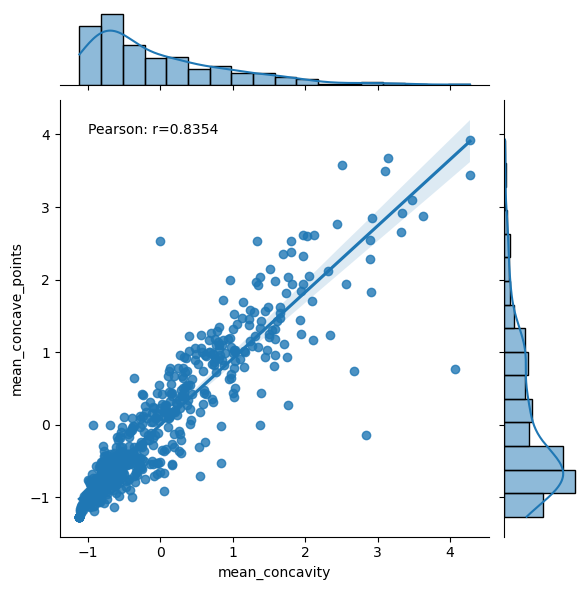

In [18]:
j = sns.jointplot(df_subcancer, x="mean_concavity", y="mean_concave_points", kind="reg")
r = pearsonr(df_subcancer.mean_concavity, df_subcancer.mean_concave_points)
r_squared = np.round(r[0]**2, 4)
j.ax_joint.annotate(f"Pearson: r={r_squared}", (-1, 4))

## PCA

As you saw, the mean_concave_points and the mean_concavity were highly correlated. Matthias explained you in the lecture that we should aim for simpler models as they generalize better. If two variables are highly correlated they may give us the same information and we could just use one of them. We could then do this with all variables (features) in our data set which would take a bit or we use an “automatic” approach that put highly correlated variables together. As such, we can use principal component analysis (PCA) to reduce the dimensionality of the dataset. 

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

In general:

    PCA is used to overcome features redundancy in a data set.
    These features are low dimensional in nature.
    These features a.k.a components are a resultant of normalized linear combination of original predictor variables.
    These components aim to capture as much information as possible with high explained variance.
    The first component has the highest variance followed by second, third and so on.
    The components must be uncorrelated (remember orthogonal direction ? ).
    Normalizing data becomes extremely important when the predictors are measured in different units.
    PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.
    PCA is applied on a data set with numeric variables.
    PCA is a tool which helps to produce better visualizations of high dimensional data.

### Assignment 9: correlations

Let's start at the beginning. So far, we only have looked at one correlation. We can easily inspect scatterplots for every variable with pairplot from the seaborn library. Very handy for data inspection!

- **Make a scatterplot for every variable with ``pairplot`` and set the hue to cclass.**

You should get something like this:

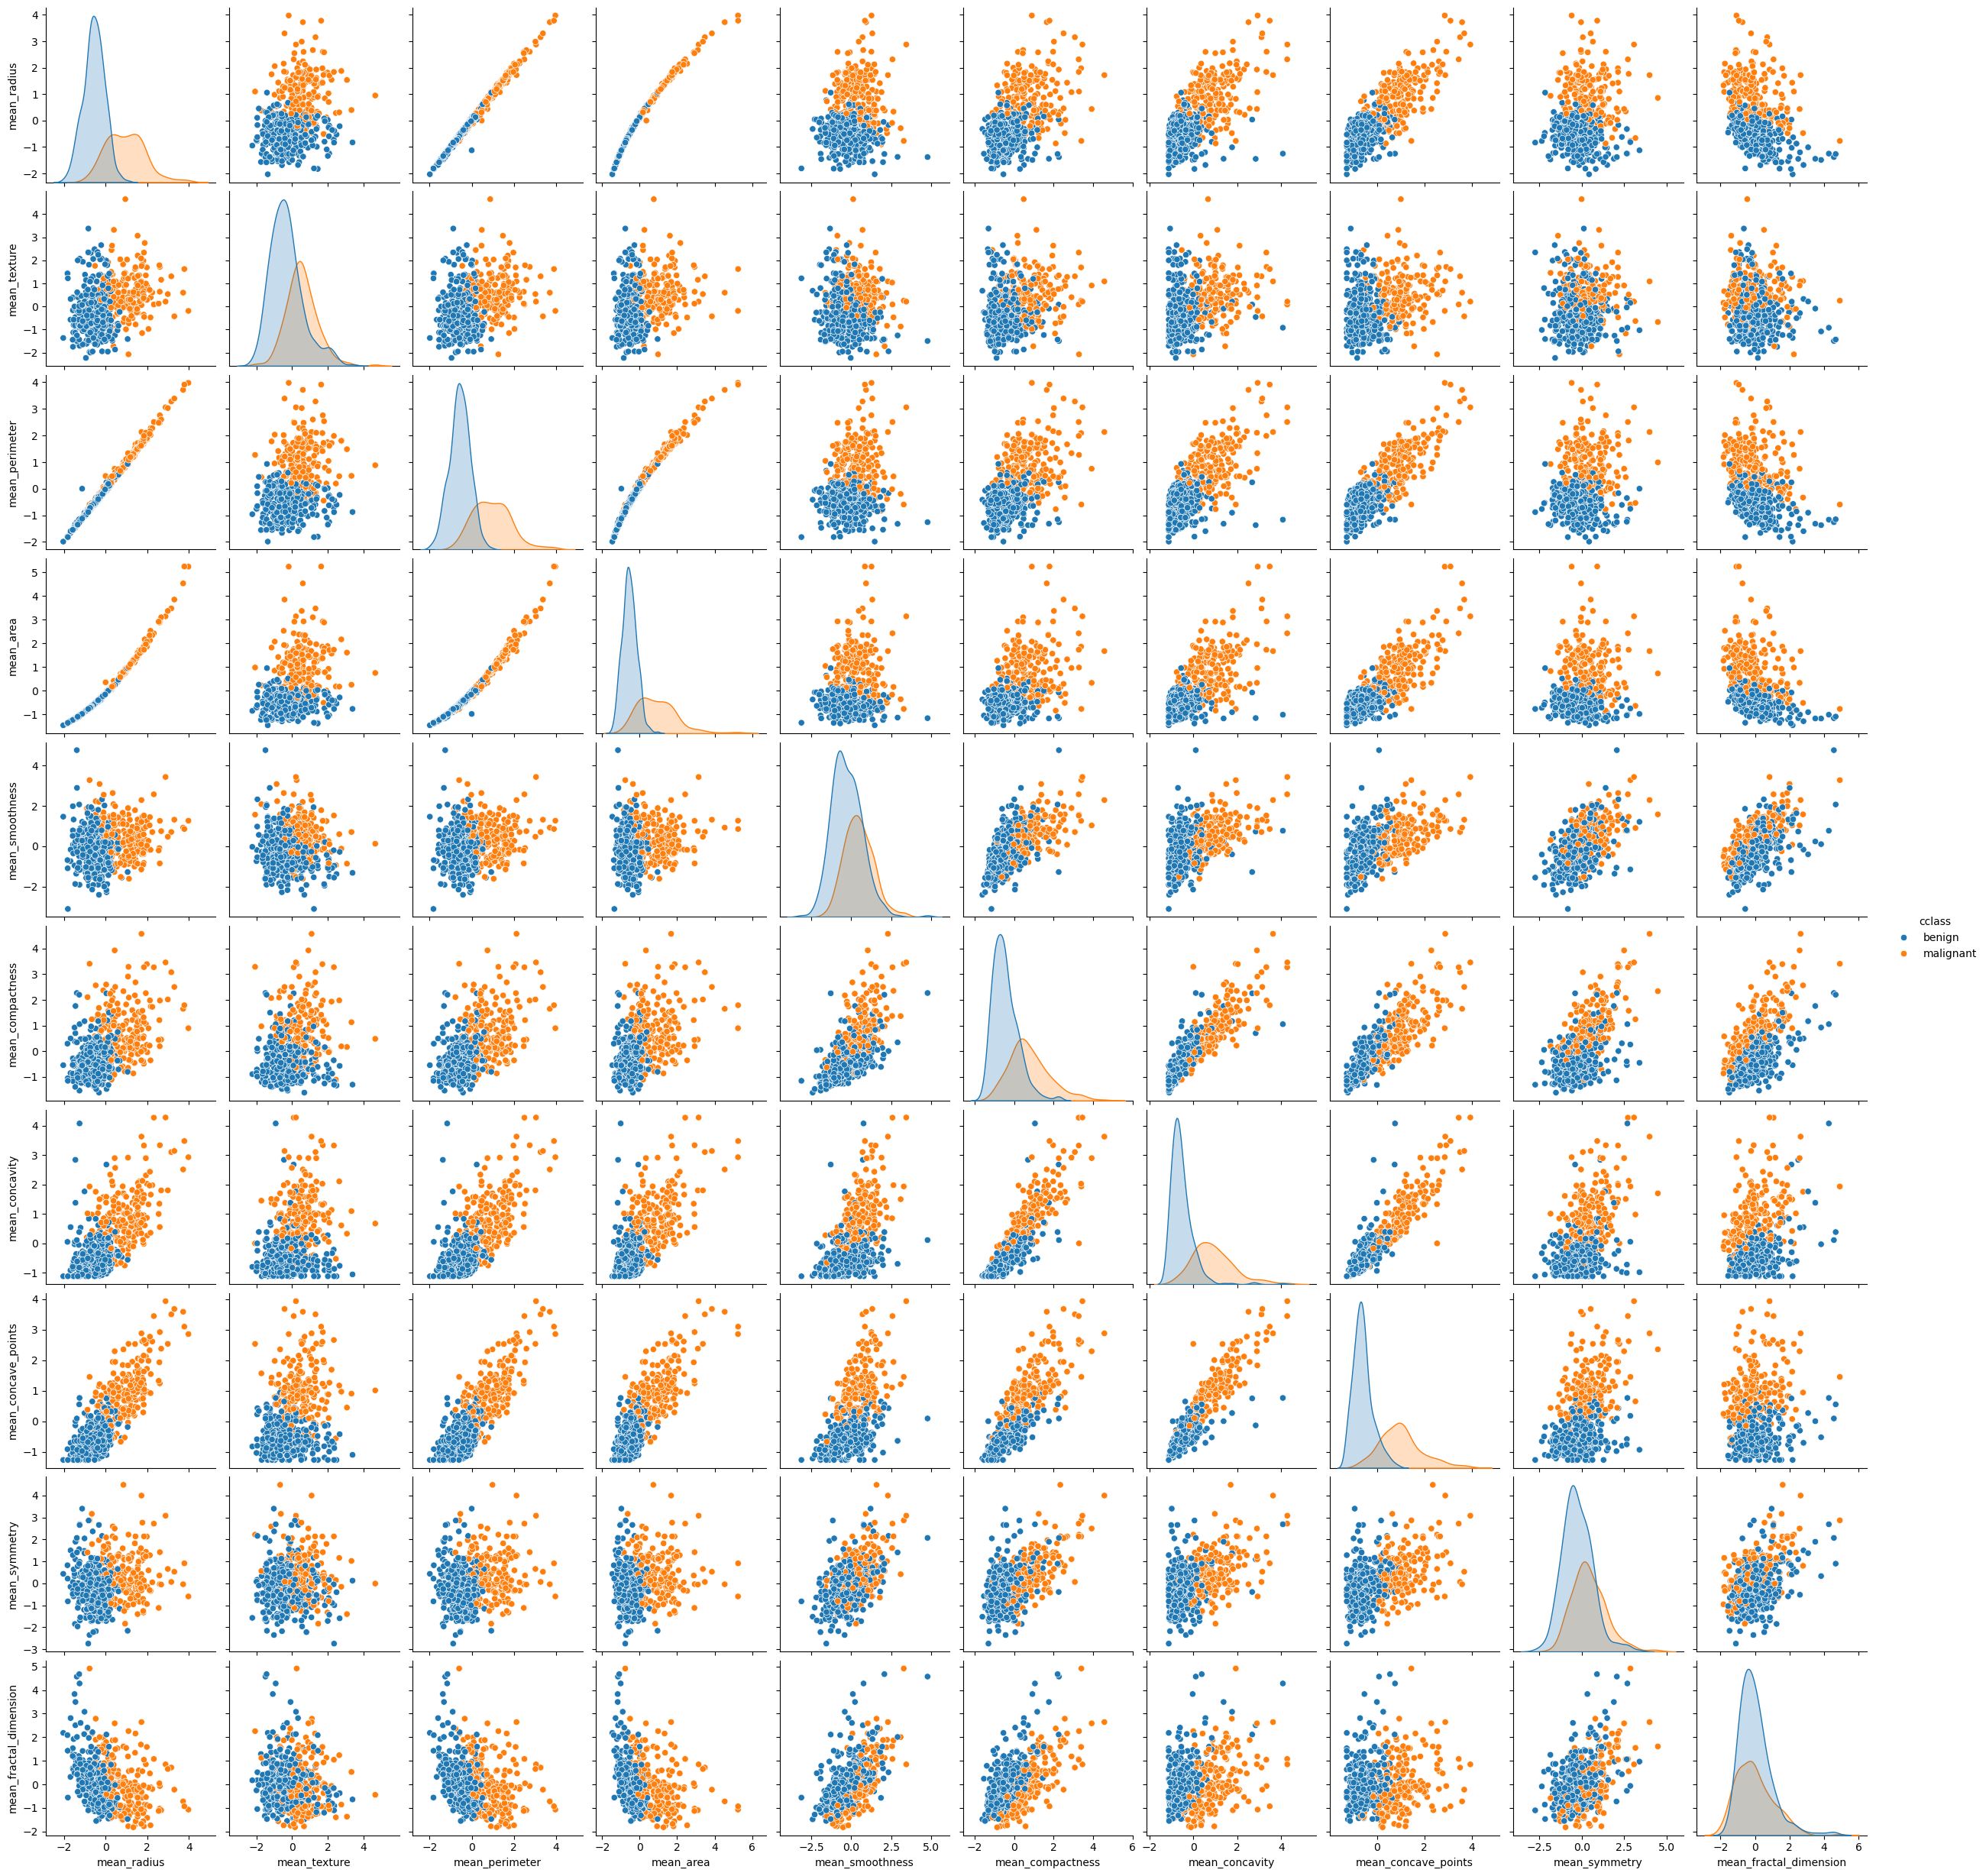

In [19]:
sns.pairplot(df_subcancer, hue="cclass");

A heatmap is another way to have more informations regarding the correlation coefficients. First calculate all the correlations of df_subcancer with ``.corr()`` from the pandas library. Make sure you calclate the **Pearson** correlation coefficient. Plot the just calculated coefficients in the heatmap with ``sns.heatmap()``, set annot to True.

- **Calculate the correlations between variables with the dataframe method ``.corr()``.**

- **Plot a heatmap with the correlations and set annot to True.**

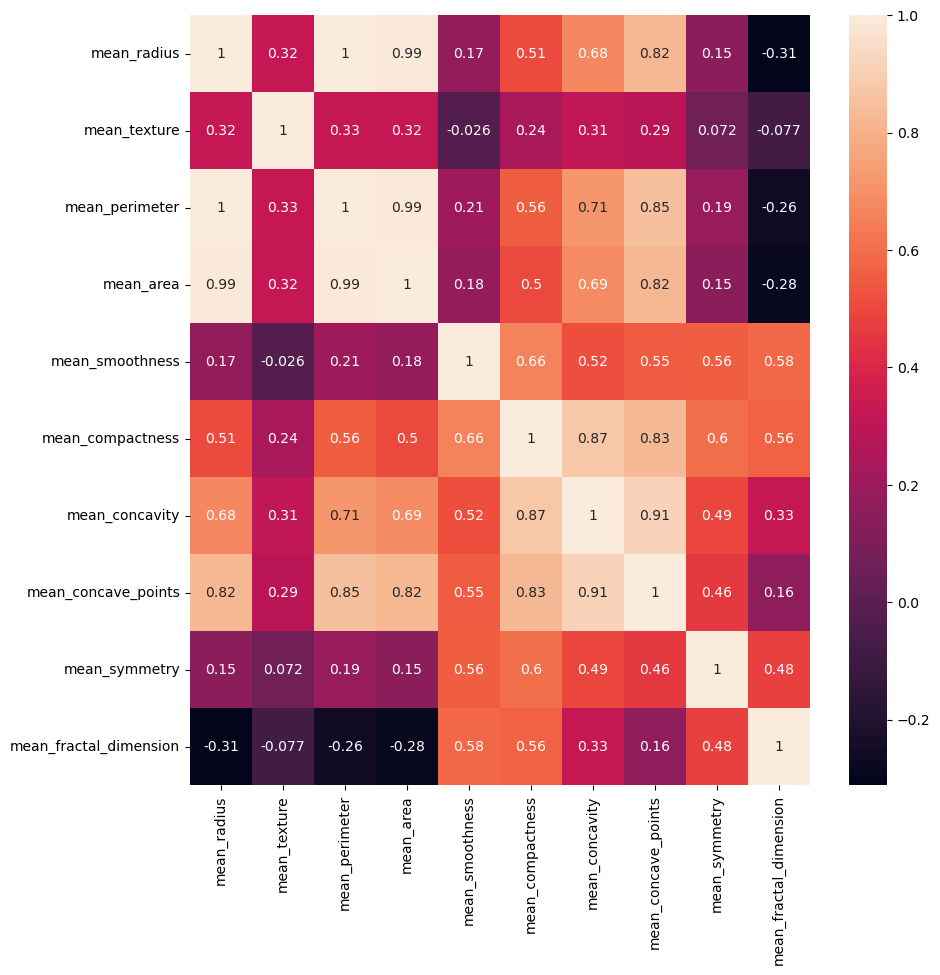

In [20]:
corr = df_subcancer.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True);

Aha, we see that more variables are highly correlated with each other. So it is interesting to do a PCA.

### Assignment 10: standardizing

::::{important} First thing on the list of things you must do is standardize the data. This is *VERY* important when doing PCA.

- **Standardize the full dataset (the one with 30 columns). Use the scaler you used before. Due to the skewness a case can be made for different scalers, but let's not worry too much about that for now.**

In [21]:
X_std = scale(df_cancer[df_cancer.columns[:-1]])

### Assignment 11: doing PCA

We are not going to give much information about how you are supposed to do the PCA, but we want you to figure this out! In the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) you can find a lot of information and also examples below. These examples can be very useful!


- **Get PCA from the sklearn.decomposition sublibrary.**
- **Call PCA().fit() on your just standardized variables.**
- **Inspect the outcome of the PCA, docs might help you.**
- **Plot the explained variance ratio (which is an attribute of your outcome).** 
- **Add an x and ylabel to the axes.**

You should get something like this:

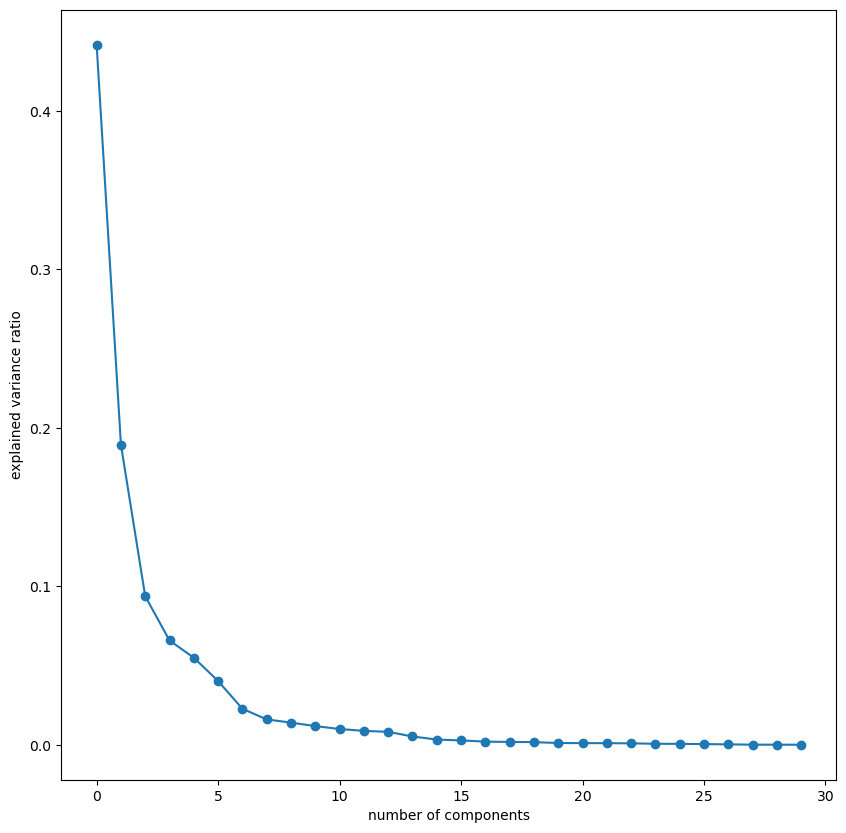

In [22]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.figure(figsize=(10, 10))
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.show()

There is no real nice kink where we can say we should select our data. However, about 5ish components seem to do the job. In that way, we cut the amount of variables needed for our secondary analyses by more than half. This should reduce the computational load for our machine learning models by a lot!

If you have decided on a number for your PCA you can repeat the PCA with the selected number of components.

- **Initialize a PCA object with n_components=5.**
- **Call fit_transform on your standardized variables and save it to a new variable.**
- **Print the explained variance ratio and the shape of your transformed array.**

In [23]:
pca = PCA(n_components=5)
X_PCA = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)
X_PCA.shape

[0.44185852 0.18938706 0.09371742 0.06584638 0.05493688]


(569, 5)

From the above output you can observe that the principal component 1 holds 44.2% of the information, the second holds only 19% of the information. the third, fourth and fifth contain 9.3%, 6.6% and 5.5%. Also, the other point to note is that while projecting thirty-dimensional data to a five-dimensional data, 15.4% information was lost. The last step is to see which original variables contribute to the components.

- **Inspect the components_ attribute of the pca, what does it contain?**
````{margin}
```{admonition} Tip
:class: tip
Notice that the weights have the same length as the amount of columns. The first weight belongs to the first column, second to the second etc. [Merge](https://pandas.pydata.org/docs/user_guide/merging.html) these DataFrames and print the top3!
```
````
- **For now, we will only look into the first feature, make a DataFrame of the first feature**
- **Make also a DataFrame of the columns names (all 30)**
- **Find the three variables with the highest contribution to the first feature**

In [24]:
print(pca.components_, '\n')

feature1 = pd.DataFrame(pca.components_[0], columns=['weight'])  # only first feature
columns = pd.DataFrame(df_cancer.columns[:-1], columns=['var'])  # take columns
merged = pd.concat([feature1, columns], axis=1)  # weights belong to columns
top3 = merged.sort_values(by='weight', ascending=False).head(3)  # top 3
print(top3)

[[ 0.21928383  0.10385045  0.22795367  0.22150681  0.14240512  0.23927693
   0.25717553  0.2608693   0.13818167  0.06364864  0.20625271  0.01640769
   0.21155602  0.20317108  0.01433502  0.17036198  0.15362198  0.18262416
   0.04235556  0.10243966  0.22846686  0.10475774  0.23701011  0.2252739
   0.12738707  0.21007062  0.22887925  0.25105886  0.12277763  0.13030218]
 [-0.23352754 -0.05890972 -0.2141068  -0.23070771  0.18633154  0.15260912
   0.05982412 -0.03494322  0.19054577  0.36659998 -0.10531415  0.09050836
  -0.08919361 -0.15205363  0.20442326  0.23357708  0.1979705   0.13022472
   0.18389411  0.28055883 -0.21933371 -0.04504544 -0.19948289 -0.21903759
   0.17221946  0.14442067  0.09881262 -0.00762406  0.14220931  0.27487824]
 [-0.00839234  0.06552157 -0.00876699  0.0285345  -0.10404868 -0.07420809
   0.00465939 -0.02580037 -0.04110241 -0.02279486  0.26856274  0.37364179
   0.26675555  0.21619777  0.30886111  0.15501522  0.1769661   0.22342605
   0.28843772  0.21146176 -0.04795357

Good job, your CPU will thank you later! You can get a lot of information of your features. After the fancy regression analyses and you nicely performed PCA we will now move over to Hypothesis testing

```{note}
Remember, normally, Hypothesis testing comes before regression and PCA..
```

## Hypothesis testing

Point estimates such as the mean and median are a nice way to describe the population, but the difference could be cause only by chance, because of the variability of both estimates. R.A. Fisher (1890–
1962) proposed an alternative, known as hypothesis testing, that is based on the
concept of statistical significance. We can see that the mean_radius for benign and malignant cells is different, but is this due to chance or can we consider them as belonging to two different populations. Then, the relevant question is: Are the observed effects real or not?

Technically, the question is usually translated to: Were the observed effects statistically significant?
The process of determining the statistical significance of an effect is called hypothesis testing.

This process starts by simplifying the options into two competing hypotheses:

>- H 0 : The mean mean_radius is the same in benign and malignant cells
>
>- H A : The mean mean_radius of benign and malignant cells is different

We call H 0 the null hypothesis and it represents a skeptical point of view: the
effect we have observed is due to chance (due to the specific sample bias). H A is the
alternative hypothesis and it represents the other point of view: the effect is real.
The general rule of frequentist hypothesis testing: we will not discard H 0 (and
hence we will not consider H A ) unless the observed effect is implausible under H 0 

### Assignment 12: confidence interval

We can use the concept represented by confidence intervals to measure the plausibility of a hypothesis

If the interval spreads out 1.96 standard errors from a normally distributed point
estimate, intuitively we can say that we are roughly 95% confident that we have
captured the true parameter. (we will make some assumptions here which we will address later)

CI = [mean − 1.96 × SE, mean + 1.96 × SE]

The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%. Consider the following statements about P-values and confidence intervals:
```{note}
If the P value is less than your significance (alpha) level, the hypothesis test is statistically significant.
If the confidence interval does not contain the null hypothesis value, the results are statistically significant.
If the P value is less than alpha, the confidence interval will not contain the null hypothesis value.
```

````{margin}
```{admonition} Tip
:class: tip
The SE can be calculated with se = sample.std() / np.sqrt(len(sample))
```
````
- **Calculate the confidence interval for the malignant cells.**
- **Print the mean mean_radius for the malignant cells and the benign cells.**
- **Are the benign cells positioned in the confidence interval of the malignant cells?**

You should get something like this:

In [25]:
n = len(df_submalig.mean_radius)
mean = df_submalig.mean_radius.mean()
s = df_submalig.mean_radius.std()
ci = [mean - s*1.96/np.sqrt(n), mean + s*1.96/np.sqrt(n)]

print("Mean radius of malignant cells:", df_submalig.mean_radius.mean())
print("Mean radius of benign cells:", df_subbenign.mean_radius.mean())
print("Confidence interval for malignant cells", ci)

Mean radius of malignant cells: 17.45502067001063
Mean radius of benign cells: 12.146523809523808
Confidence interval for malignant cells [np.float64(17.022897777533426), np.float64(17.887143562487832)]


Hypothesis testing is built around rejecting or failing to reject the null hypothesis.
That is, we do not reject H 0 unless we have strong evidence against it. But what
precisely does strong evidence mean? As a general rule of thumb, for those cases
where the null hypothesis is actually true, we do not want to incorrectly reject H 0
more than 5% of the time. This corresponds to a significance level of α = 0.05. In
this case, the correct interpretation of our test is as follows:
```{note}
If we use a 95% confidence interval to test a problem where the null hypothesis is true, we will make an error whenever the point estimate is at least 1.96 standard errors away from the population parameter. This happens about 5% of the time (2.5% in each tail).
```
    
How about our data?

### Assignment 13: using statistical testing

Statistical testing in Python is relatively easy. There are two main packages available for regular frequentist statistical testing: [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) and [statsmodels](https://www.statsmodels.org/stable/index.html). If you like R you will like statsmodels. We will however use scipy.stats as it is the most straightforward.

First, a simple independent t-test. We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

Let's start by comparing mean_radius between malignant and benign cases. To not anger the statistics lecturers too much we should probably test for a normal distribution and equality of variances first. 

- **Import shapiro, levene, normaltest, skewtest, and kurtosistest from the scipy.stats sublibrary. Alternatively, just import the entire library with ``from scipy.stats import *``. Be careful with the * strategy, but in this case it is a reasonable thing to do.**

- **Check whether the data is normally distributed by performing all three tests on both the benign malignent data.**

You should get something like this:

In [26]:
for df in [df_submalig, df_subbenign]:
    print("Shapiro-Wilks result:", shapiro(df["mean_radius"]))
    print(normaltest(df["mean_radius"]))
    print(skewtest(df["mean_radius"]))
    print(kurtosistest(df["mean_radius"]), "\n")

Shapiro-Wilks result: ShapiroResult(statistic=np.float64(0.9773182753969164), pvalue=np.float64(0.0016936912342207795))
NormaltestResult(statistic=np.float64(9.686495794212812), pvalue=np.float64(0.007881414413611105))
SkewtestResult(statistic=np.float64(2.90838584489848), pvalue=np.float64(0.003632997870875027))
KurtosistestResult(statistic=np.float64(1.1080557618671392), pvalue=np.float64(0.26783773458996163)) 

Shapiro-Wilks result: ShapiroResult(statistic=np.float64(0.996653150716253), pvalue=np.float64(0.667993058329974))
NormaltestResult(statistic=np.float64(0.43450621582472615), pvalue=np.float64(0.804726260942059))
SkewtestResult(statistic=np.float64(-0.6554943683613623), pvalue=np.float64(0.5121495110994712))
KurtosistestResult(statistic=np.float64(0.0695222904633095), pvalue=np.float64(0.9445738903539361)) 



OK, we have some issues with normality here, so we will use a non-parametric test later. First, let's do the parametric one anyways.

- **Appease your statistics lectureres by performing a levenes test, simply enter the date into ``levene()``.**
````{margin}
```{admonition} Tip
:class: tip
Make use of an if statement.
```python
if p < 0.05:
    ...
else:
    ...
```
````
- **Make a variable that is either True or False based on the result of Levene's test.**

- **Perform a ``.ttest_ind()`` and specify the equal_vars parameter with your just made True or False variable.**

- **Print something based on the result of your test.**

You should get something like this:

In [27]:
l_test = levene(df_subbenign["mean_radius"], df_submalig["mean_radius"])
print(l_test)

p = l_test[1]
if p < 0.05:
    print("Equal variances not assumed")
    e_vars = False
else:
    print("Equal variances assumed")
    e_vars = True

ttest_result = ttest_ind(df_subbenign["mean_radius"], df_submalig["mean_radius"], equal_var=e_vars)
print(ttest_result)

p = ttest_result[1]
if p < 0.05:
    print("The difference is statistically significant!")
else:
    print("The difference is not statistically significant")

LeveneResult(statistic=np.float64(91.73611010027955), pvalue=np.float64(3.051697919386974e-20))
Equal variances not assumed
TtestResult(statistic=np.float64(-22.140354585111893), pvalue=np.float64(3.1261597609059325e-64), df=np.float64(289.4131544176738))
The difference is statistically significant!


This is pretty much what we expected from our figures and our simulation. Also, with this amount of data it is pretty hard not to find a significantly different result. Now do the same thing with a non-parametric test. Note that the data was not normally distributed, so we should have actually tested with a Mann-Whitney U in the first place.

- **Repeat the test with a Mann-Whitney U from the scipy library. Print something based on the p-value, your alpha is 0.05, as is tradition.**

You should get something like this:

In [28]:
mann_result = mannwhitneyu(df_subbenign["mean_radius"], df_submalig["mean_radius"])  # non-parametric test
print(mann_result)

p = mann_result[1]
if p < 0.05:
    print("The difference is statistically significant😎")
else:
    print("The difference is not statistically significant")

MannwhitneyuResult(statistic=np.float64(4769.0), pvalue=np.float64(3.896384606866101e-68))
The difference is statistically significant😎


Another way to go about this is to use a linear model. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes. We can also apply the ANOVA on this data. The only difference is that you will get an F-statistic instead of a T-statistic.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
```{note}
The samples are independent. Each sample is from a normally distributed population. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
```
Actually, ANOVA is incredibly robust if you have the same sample sizes. Unfortunately, this is not the case for us. I still want you to perform one though.

- **Perform the same test using ``f_oneway`` from the scipy.stats sublibrary. Print something based on the p-value.**

- **The assumption of normality is violated. ANOVA is very robust IF we have the same sample size for both groups. This is not the case, therefore you should repeat this exercise with the non-parametric variant. Use the ``kruskal`` test from the same library.**

You should get something like this:

In [29]:
anova_result = f_oneway(df_subbenign["mean_radius"], df_submalig["mean_radius"])
print(anova_result)

p = anova_result[1]
if p < 0.05:
    print("The difference is statistically significant 😍")
else:
    print("The difference is not statistically significant")
    
kruskal_result = kruskal(df_subbenign["mean_radius"], df_submalig["mean_radius"])
print(kruskal_result)

p = kruskal_result[1]
if p < 0.05:
    print("The difference is statistically significant 😍")
else:
    print("The difference is not statistically significant")

F_onewayResult(statistic=np.float64(643.4604929440599), pvalue=np.float64(1.931069886565536e-95))
The difference is statistically significant 😍
KruskalResult(statistic=np.float64(304.2647033782467), pvalue=np.float64(3.878444681287192e-68))
The difference is statistically significant 😍


Good Job! Now you are ready for the real machine learning fun, see you next week!